In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk import tokenize
from textblob import TextBlob
%matplotlib inline
sns.set()

In [14]:
df2 = pd.read_csv('ethiopia_tripadvisor_data_1.csv') # df2 is the same as df1 (we just saved it before into a csv file)
df2.head()

,Destination Name,Destination Type,Rating,Review Head,Review Body,Date
0,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,October 2019
1,Rock-Hewn Churches of Lalibela,Landmarks,5,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,October 2019
2,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible experience,A must visit in Ethiopia - one of the most uni...,October 2019
3,Rock-Hewn Churches of Lalibela,Landmarks,4,Amazing,These churches have to be seen to be believed....,October 2019
4,Rock-Hewn Churches of Lalibela,Landmarks,5,So much history,Thanks to our tour organiser Ephram who is bas...,October 2019


In [15]:
df2 = df2.mask(df2.eq('None')).dropna()
df2.head()

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Destination Name,Destination Type,Rating,Review Head,Review Body,Date
0,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,October 2019
1,Rock-Hewn Churches of Lalibela,Landmarks,5,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,October 2019
2,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible experience,A must visit in Ethiopia - one of the most uni...,October 2019
3,Rock-Hewn Churches of Lalibela,Landmarks,4,Amazing,These churches have to be seen to be believed....,October 2019
4,Rock-Hewn Churches of Lalibela,Landmarks,5,So much history,Thanks to our tour organiser Ephram who is bas...,October 2019


In [16]:
df2 = df2.drop_duplicates()
print(df2.duplicated().sum())
print(df2.isnull().sum())
print(df2.isna().sum())

0
Destination Name    0
Destination Type    0
Rating              0
Review Head         0
Review Body         0
Date                0
dtype: int64
Destination Name    0
Destination Type    0
Rating              0
Review Head         0
Review Body         0
Date                0
dtype: int64


In [17]:
df2['Review Text'] = df2['Review Head'] + ' ' + df2['Review Body'] # Review Text = Review Head + Review Body
df2['RB_Sentence1'] = df2['Review Body'].apply(lambda x: tokenize.sent_tokenize(x)[0]) # RB_Sentence 1 = Review Body Sentence 1
df2['Review Head'] = df2['Review Head'].apply(lambda x: re.sub('\s+', ' ', x))
df2['Review Body'] = df2['Review Body'].apply(lambda x: re.sub('\s+', ' ', x))
df2['Review Text'] = df2['Review Text'].apply(lambda x: re.sub('\s+', ' ', x))
df2['RB_Sentence1'] = df2['RB_Sentence1'].apply(lambda x: re.sub('\s+', ' ', x))
df2.head()

,Destination Name,Destination Type,Rating,Review Head,Review Body,Date,Review Text,RB_Sentence1
0,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,October 2019,Incredible locations don't be put off thinking...,Amazing location must visit.
1,Rock-Hewn Churches of Lalibela,Landmarks,5,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,October 2019,It is a real miracle of the world! I do recomm...,I do recommend to visit Lalibela churches and ...
2,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible experience,A must visit in Ethiopia - one of the most uni...,October 2019,Incredible experience A must visit in Ethiopia...,A must visit in Ethiopia - one of the most uni...
3,Rock-Hewn Churches of Lalibela,Landmarks,4,Amazing,These churches have to be seen to be believed....,October 2019,Amazing These churches have to be seen to be b...,These churches have to be seen to be believed.
4,Rock-Hewn Churches of Lalibela,Landmarks,5,So much history,Thanks to our tour organiser Ephram who is bas...,October 2019,So much history Thanks to our tour organiser E...,Thanks to our tour organiser Ephram who is bas...


In [18]:
df2['TextBlob Polarity Head'] = df2['Review Head'].map(lambda text: TextBlob(text).sentiment.polarity)
df2['TextBlob Polarity Body'] = df2['Review Body'].map(lambda text: TextBlob(text).sentiment.polarity)
df2['TextBlob Polarity Text'] = df2['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)
df2['TextBlob Polarity RBS1'] = df2['RB_Sentence1'].map(lambda text: TextBlob(text).sentiment.polarity)
df2.head()

,Destination Name,Destination Type,Rating,Review Head,Review Body,Date,Review Text,RB_Sentence1,TextBlob Polarity Head,TextBlob Polarity Body,TextBlob Polarity Text,TextBlob Polarity RBS1
0,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,October 2019,Incredible locations don't be put off thinking...,Amazing location must visit.,-0.05,0.300000,0.125000,0.6000
1,Rock-Hewn Churches of Lalibela,Landmarks,5,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,October 2019,It is a real miracle of the world! I do recomm...,I do recommend to visit Lalibela churches and ...,0.25,-0.150000,-0.016667,0.0000
2,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible experience,A must visit in Ethiopia - one of the most uni...,October 2019,Incredible experience A must visit in Ethiopia...,A must visit in Ethiopia - one of the most uni...,0.90,0.345000,0.483750,0.4375
3,Rock-Hewn Churches of Lalibela,Landmarks,4,Amazing,These churches have to be seen to be believed....,October 2019,Amazing These churches have to be seen to be b...,These churches have to be seen to be believed.,0.60,0.225000,0.350000,0.0000
4,Rock-Hewn Churches of Lalibela,Landmarks,5,So much history,Thanks to our tour organiser Ephram who is bas...,October 2019,So much history Thanks to our tour organiser E...,Thanks to our tour organiser Ephram who is bas...,0.20,0.233333,0.228571,0.2000


In [19]:
df2['RH_Split'] = df2['Review Head'].apply(lambda x: x.split(' '))
df2['RB_Split'] = df2['Review Body'].apply(lambda x: x.split(' '))
df2['RT_Split'] = df2['Review Text'].apply(lambda x: x.split(' '))
df2['RB_Sentence1_Split'] = df2['RB_Sentence1'].apply(lambda x: x.split(' '))
df2.head()

,Destination Name,Destination Type,Rating,Review Head,Review Body,Date,Review Text,RB_Sentence1,TextBlob Polarity Head,TextBlob Polarity Body,TextBlob Polarity Text,TextBlob Polarity RBS1,RH_Split,RB_Split,RT_Split,RB_Sentence1_Split
0,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,October 2019,Incredible locations don't be put off thinking...,Amazing location must visit.,-0.05,0.300000,0.125000,0.6000,"[Incredible, locations, don't, be, put, off, t...","[Amazing, location, must, visit., This, site, ...","[Incredible, locations, don't, be, put, off, t...","[Amazing, location, must, visit.]"
1,Rock-Hewn Churches of Lalibela,Landmarks,5,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,October 2019,It is a real miracle of the world! I do recomm...,I do recommend to visit Lalibela churches and ...,0.25,-0.150000,-0.016667,0.0000,"[It, is, a, real, miracle, of, the, world!]","[I, do, recommend, to, visit, Lalibela, church...","[It, is, a, real, miracle, of, the, world!, I,...","[I, do, recommend, to, visit, Lalibela, church..."
2,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible experience,A must visit in Ethiopia - one of the most uni...,October 2019,Incredible experience A must visit in Ethiopia...,A must visit in Ethiopia - one of the most uni...,0.90,0.345000,0.483750,0.4375,"[Incredible, experience, ]","[A, must, visit, in, Ethiopia, -, one, of, the...","[Incredible, experience, A, must, visit, in, E...","[A, must, visit, in, Ethiopia, -, one, of, the..."
3,Rock-Hewn Churches of Lalibela,Landmarks,4,Amazing,These churches have to be seen to be believed....,October 2019,Amazing These churches have to be seen to be b...,These churches have to be seen to be believed.,0.60,0.225000,0.350000,0.0000,[Amazing],"[These, churches, have, to, be, seen, to, be, ...","[Amazing, These, churches, have, to, be, seen,...","[These, churches, have, to, be, seen, to, be, ..."
4,Rock-Hewn Churches of Lalibela,Landmarks,5,So much history,Thanks to our tour organiser Ephram who is bas...,October 2019,So much history Thanks to our tour organiser E...,Thanks to our tour organiser Ephram who is bas...,0.20,0.233333,0.228571,0.2000,"[So, much, history]","[Thanks, to, our, tour, organiser, Ephram, who...","[So, much, history, Thanks, to, our, tour, org...","[Thanks, to, our, tour, organiser, Ephram, who..."


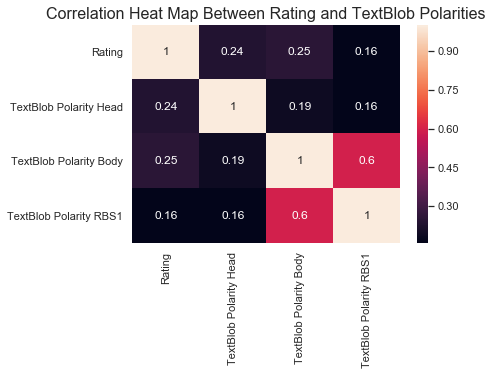

In [22]:
df3 = df2[['Rating', 'TextBlob Polarity Head', 'TextBlob Polarity Body', 'TextBlob Polarity RBS1']]
corr = df3.corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation Heat Map Between Rating and TextBlob Polarities', fontsize = 16)
plt.show()